# KNN for Movie Recommendation

### Assigned to Chaitanya  Vallabhaneni

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
ratings = pd.read_csv('ratings.csv')
ratings.head()


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [3]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
unique_user = ratings.userId.nunique(dropna = True)
unique_movie = ratings.movieId.nunique(dropna = True)
print("number of unique user:")
print(unique_user)
print("number of unique movies:")
print(unique_movie)

number of unique user:
162541
number of unique movies:
59047


In [5]:
# for creating item user matrix  .. we need to check how many ratings we have here or how many are absent .
total_ratings = unique_user*unique_movie
rating_present = ratings.shape[0]

ratings_not_provided = total_ratings - rating_present 

print("ratings not provided means some user have not watched some movies and its given by")
print(ratings_not_provided)
print("sparsity of user-item matrix is :")
print(ratings_not_provided / total_ratings)

ratings not provided means some user have not watched some movies and its given by
9572558332
sparsity of user-item matrix is :
0.9973951609474271


In [6]:
# 1)plot ratings count which gives information about which rating(on scale of 0 t0 5) is more frequent

rating_cnt = pd.DataFrame(ratings.groupby('rating').size(),columns=['count'])
rating_cnt
# this rating cnt doesnt contain count of rating 0
# append rating_cnt

rating_cnt = rating_cnt.append(pd.DataFrame({'count':ratings_not_provided},index = [0])).sort_index()
rating_cnt

#since the count of rating 0 is too large in comparison to others rating ...use lag value
rating_cnt['log_count'] = np.log(rating_cnt['count'])
rating_cnt

,count,log_count
0.0,9572558332,22.982166
0.5,393068,12.881738
1.0,776815,13.562958
1.5,399490,12.897944
2.0,1640868,14.310736
2.5,1262797,14.048840
3.0,4896928,15.404119
3.5,3177318,14.971548
4.0,6639798,15.708592
4.5,2200539,14.604213


frequency of rating like 3 and 4 are more in compare to other ratings


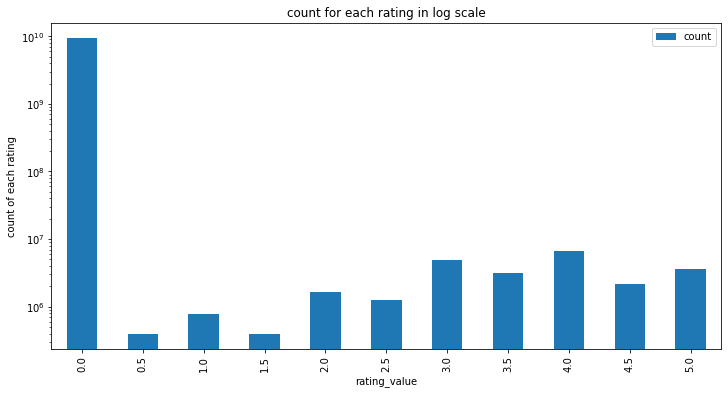

In [7]:
# plot a bar plot to visualise the ratings
rating_cnt_for_vis = rating_cnt
ax = rating_cnt_for_vis.reset_index().rename(columns = {'index':'rating_value'}).plot(
    x='rating_value',
    y='count',
    logy = True,
    kind='bar',
    title='count for each rating in log scale',
    figsize=(12,6)
)
ax.set_xlabel('rating_value')
ax.set_ylabel('count of each rating')
print("frequency of rating like 3 and 4 are more in compare to other ratings")

In [8]:
# 2) plot rating frequency of each movie(how many time a movie has been rated)

movie_freq = pd.DataFrame(ratings.groupby('movieId').size(),columns=['count'])
movie_freq.head()

,count
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714


Text(0, 0.5, 'rating freq of movies')

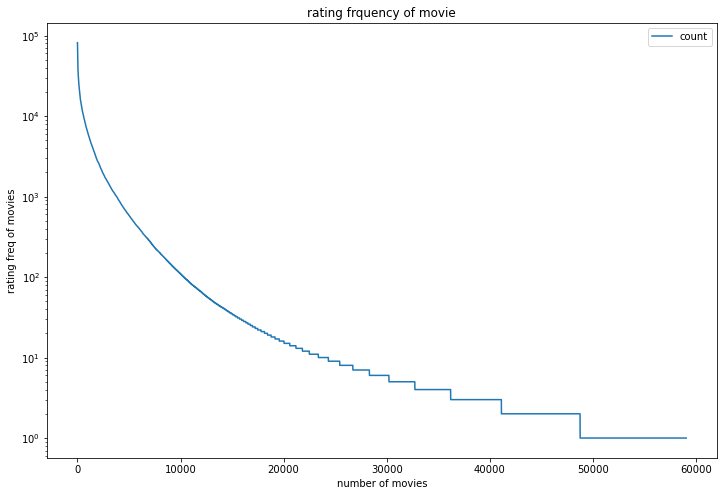

In [9]:
# plot movie rating freq
movie_freq_copy = movie_freq.sort_values(by='count',ascending=False)
movie_freq_copy=movie_freq_copy.reset_index(drop=True)

ax1  = movie_freq_copy.plot(
    title='rating frquency of movie',
    logy=True,
    figsize=(12,8)
)
ax1.set_xlabel('number of movies')
ax1.set_ylabel('rating freq of movies')

In [10]:
# we can see that most of the movies are rated very rarely ..
# so we can remove those movies which are rated less than 50 times.

threshold_rating_freq = 10
# first take out the movie id  for which movie is rated more than threshold value than keep only this movies in our original ratings dataframe
# movie_freq.query('count>= @threshold_rating_freq').shape = (13360,1)
# our original movie_freq has shape of (9724 ,1) and now its reduce to (2269,1)
# so now lets reduce the size of ratings dataframe

popular_movies_id = list(set(movie_freq.query('count>=@threshold_rating_freq').index))

# ratings df after dropping non popular movies
ratings_with_popular_movies = ratings[ratings.movieId.isin(popular_movies_id)]

print('shape of ratings:')
print(ratings.shape)

print('shape of ratings_with_popular_movies:')
print(ratings_with_popular_movies.shape)

print("no of movies which are rated more than 50 times:")
print(len(popular_movies_id))


print("no of unique movies present in dataset:")
print(unique_movie)

shape of ratings:
(25000095, 4)
shape of ratings_with_popular_movies:
(24890583, 4)
no of movies which are rated more than 50 times:
24330
no of unique movies present in dataset:
59047
